In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load file using default delimiter (so you get the single-column DataFrame)
file_path = '../data/MachineLearningRating_v3.txt'
df = pd.read_csv(file_path, sep='\t')  # still 1 column

# Step 2: Split the single column using '|' into multiple columns
df_split = df.iloc[:, 0].str.split('|', expand=True)

# Step 3: Assign proper column names
df_split.columns = [
    "UnderwrittenCoverID", "PolicyID", "TransactionMonth", "IsVATRegistered", "Citizenship",
    "LegalType", "Title", "Language", "Bank", "AccountType", "MaritalStatus", "Gender",
    "Country", "Province", "PostalCode", "MainCrestaZone", "SubCrestaZone", "ItemType",
    "mmcode", "VehicleType", "RegistrationYear", "make", "Model", "Cylinders", "cubiccapacity",
    "kilowatts", "bodytype", "NumberOfDoors", "VehicleIntroDate", "CustomValueEstimate",
    "AlarmImmobiliser", "TrackingDevice", "CapitalOutstanding", "NewVehicle", "WrittenOff",
    "Rebuilt", "Converted", "CrossBorder", "NumberOfVehiclesInFleet", "SumInsured",
    "TermFrequency", "CalculatedPremiumPerTerm", "ExcessSelected", "CoverCategory",
    "CoverType", "CoverGroup", "Section", "Product", "StatutoryClass", "StatutoryRiskType",
    "TotalPremium", "TotalClaims"
]

# Step 4: Preview the cleaned dataset
print(df_split.shape)
print(df_split.head())



(1000098, 52)
  UnderwrittenCoverID PolicyID     TransactionMonth IsVATRegistered  \
0              145249    12827  2015-03-01 00:00:00            True   
1              145249    12827  2015-05-01 00:00:00            True   
2              145249    12827  2015-07-01 00:00:00            True   
3              145255    12827  2015-05-01 00:00:00            True   
4              145255    12827  2015-07-01 00:00:00            True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Wind

In [9]:
df=df_split

In [10]:
# Check data types and basic info
df.info()

# Descriptive stats for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   UnderwrittenCoverID       1000098 non-null  object
 1   PolicyID                  1000098 non-null  object
 2   TransactionMonth          1000098 non-null  object
 3   IsVATRegistered           1000098 non-null  object
 4   Citizenship               1000098 non-null  object
 5   LegalType                 1000098 non-null  object
 6   Title                     1000098 non-null  object
 7   Language                  1000098 non-null  object
 8   Bank                      1000098 non-null  object
 9   AccountType               1000098 non-null  object
 10  MaritalStatus             1000098 non-null  object
 11  Gender                    1000098 non-null  object
 12  Country                   1000098 non-null  object
 13  Province                  1000098 non-null

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
count,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,...,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098
unique,116532,7000,23,2,4,6,5,1,13,4,...,13,28,22,14,5,4,1,1,38959,1615
top,85645,3870,2015-08-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,.000000000000,.000000000000
freq,30,10400,106747,995075,895210,911929,933555,1000098,260811,597938,...,791235,104158,104183,824124,828125,915028,1000098,1000098,381634,997305


In [4]:
# Count missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


Series([], dtype: int64)

In [13]:

# Convert necessary columns to numeric
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')

# Compute LossRatio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)

# Convert TransactionMonth
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')


In [1]:
# Group by Province
province_group = df.groupby('Province')

# Calculate Claim Frequency
claim_freq = province_group.apply(lambda x: (x['TotalClaims'] > 0).mean())

# Calculate Claim Severity (only policies with claims)
claim_sev = province_group.apply(lambda x: x.loc[x['TotalClaims'] > 0, 'TotalClaims'].mean())

# Show summary
risk_summary = pd.DataFrame({
    'ClaimFrequency': claim_freq,
    'ClaimSeverity': claim_sev
}).reset_index()

print(risk_summary)


NameError: name 'df' is not defined

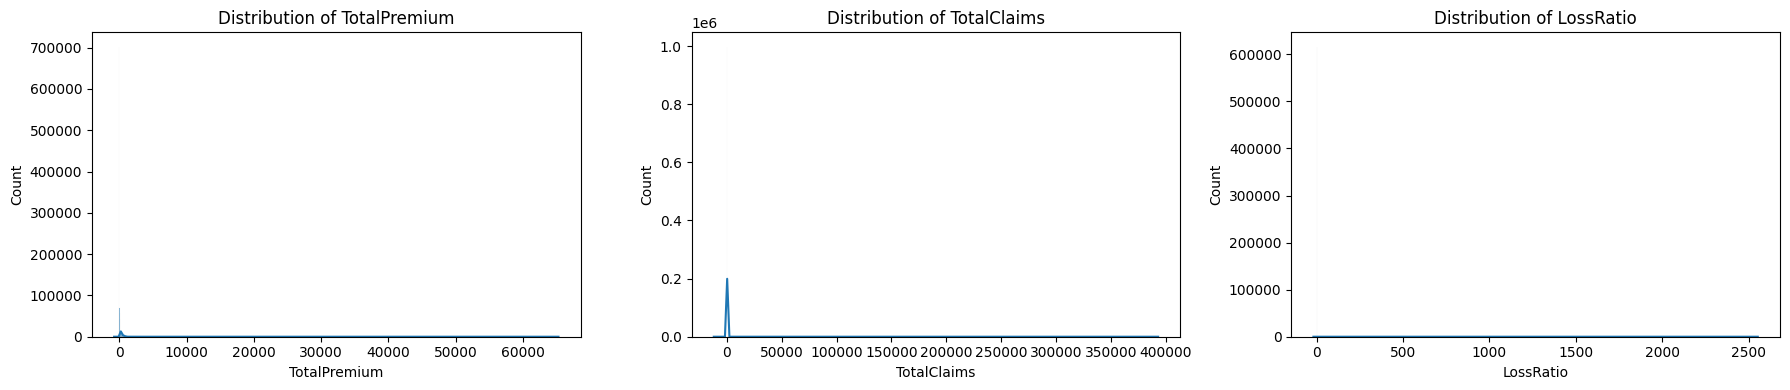

In [14]:
# Plot histograms of key numeric features
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
for ax, col in zip(axs, ['TotalPremium', 'TotalClaims', 'LossRatio']):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()


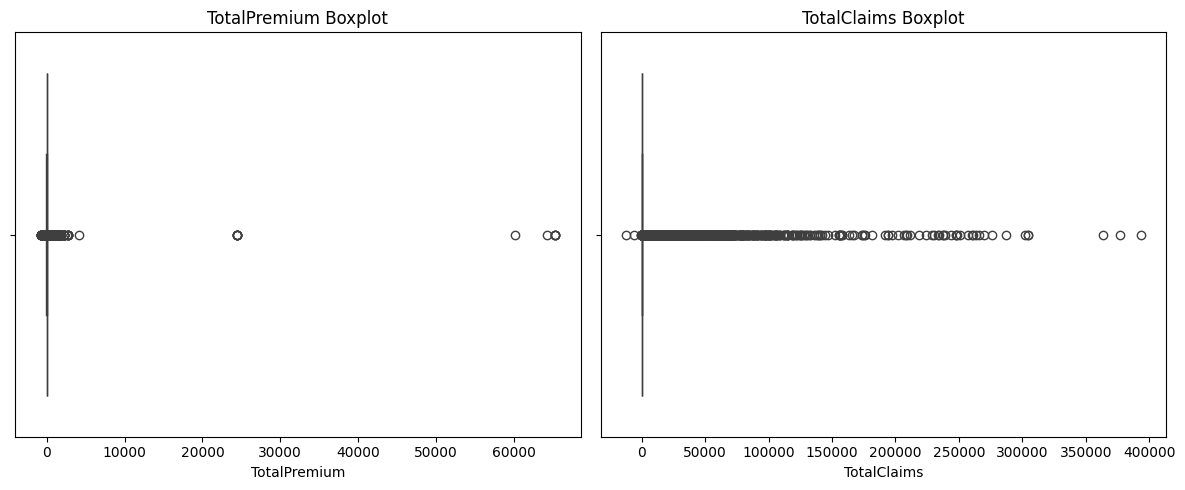

In [15]:
# Boxplots for outlier detection
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=df['TotalPremium'], ax=axs[0])
sns.boxplot(x=df['TotalClaims'], ax=axs[1])
axs[0].set_title('TotalPremium Boxplot')
axs[1].set_title('TotalClaims Boxplot')
plt.tight_layout()


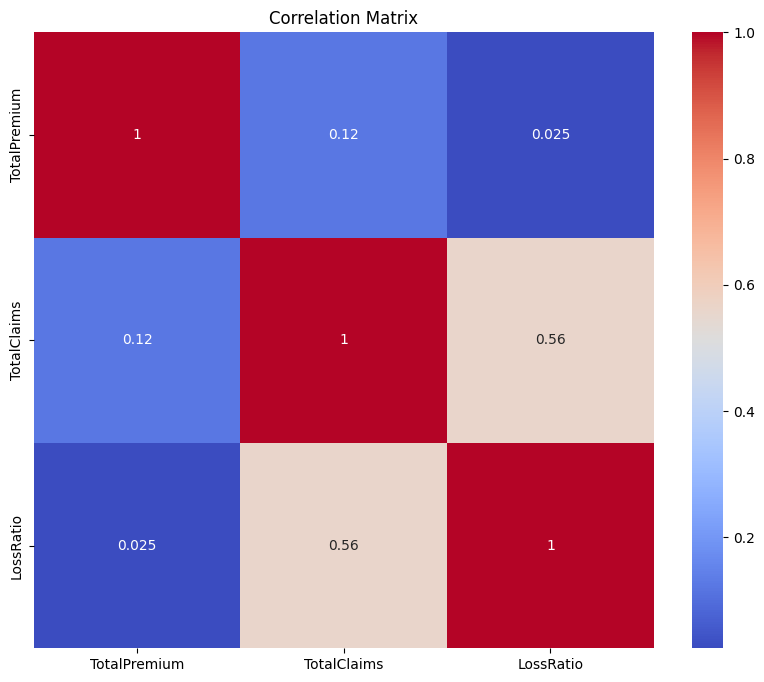

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['TotalPremium', 'TotalClaims', 'LossRatio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


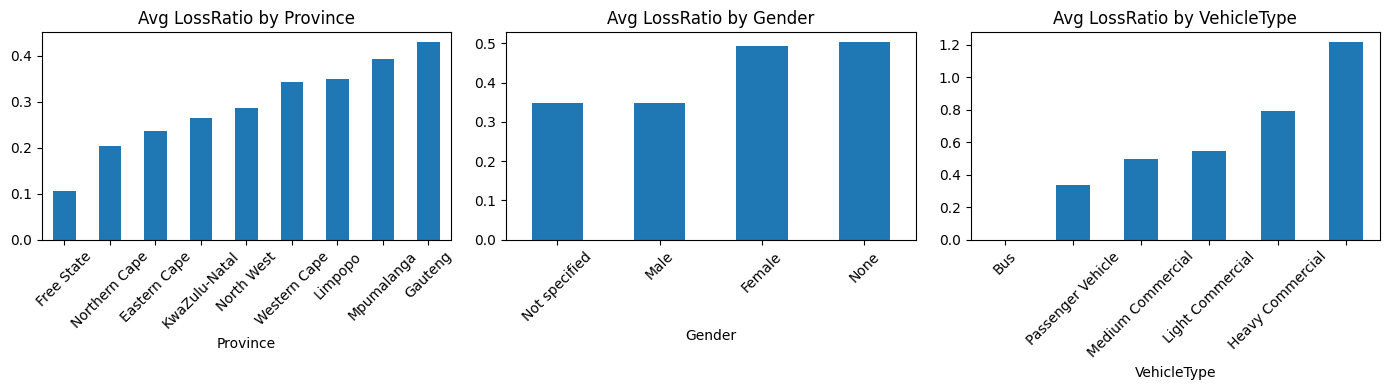

In [17]:
# Grouped loss ratio analysis
plt.figure(figsize=(14, 4))
for i, col in enumerate(['Province', 'Gender', 'VehicleType']):
    plt.subplot(1, 3, i+1)
    df.groupby(col)['LossRatio'].mean().sort_values().plot(kind='bar')
    plt.title(f'Avg LossRatio by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()


In [18]:
# Save cleaned data
df.to_csv('../data/insurance_clean.csv', index=False)


In [20]:
print(df.head(10))

  UnderwrittenCoverID PolicyID TransactionMonth IsVATRegistered Citizenship  \
0              145249    12827       2015-03-01            True               
1              145249    12827       2015-05-01            True               
2              145249    12827       2015-07-01            True               
3              145255    12827       2015-05-01            True               
4              145255    12827       2015-07-01            True               
5              145247    12827       2015-01-01            True               
6              145247    12827       2015-04-01            True               
7              145247    12827       2015-06-01            True               
8              145247    12827       2015-08-01            True               
9              145245    12827       2015-03-01            True               

           LegalType Title Language                 Bank      AccountType  \
0  Close Corporation    Mr  English  First National B